In [20]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
def find_folders(_top_folder, _folder_name):
    subfolder_path = os.path.join(_top_folder, _folder_name)
    # find all folders in the folder
    subfolder_list = os.listdir(subfolder_path)
    return subfolder_list, subfolder_path

In [4]:
def get_all_csv_files(_folder_path):
    # find all files in the folder
    file_list = os.listdir(_folder_path)
    # filter out only csv files
    csv_files = [f for f in file_list if f.endswith('.csv')]
    return csv_files

In [5]:
def read_all_csv_files(_folder_path, _csv_files, _df, _method, _initial, _new, _alpha, _beta):
    # read all csv files

    for csv_file in _csv_files:
        # get repeat number from file name (e.g. ex1.csv -> '1')
        repeat_num = csv_file.split('.')[0].split('ex')[1]
        # print('repeat_num:', repeat_num)
        
        csv_df = pd.read_csv(os.path.join(_folder_path, csv_file))
        
        # remove blank in column names
        csv_df.columns = csv_df.columns.str.strip()
        
        # add columns for method, initial, new, alpha, beta, rep
        csv_df['method'] = _method
        csv_df['initial'] = _initial
        csv_df['new'] = _new
        csv_df['alpha'] = _alpha
        csv_df['beta'] = _beta
        csv_df['rep'] = repeat_num
            
        # concat csv_df to df
        _df = pd.concat([_df, csv_df], ignore_index=True)
        # print(f'_df : {_df}')
    return _df

In [6]:
def get_df(_folder_path, _df):
    
    # Read all csv files in the folder
    if os.path.exists(_folder_path):
        method_folders = os.listdir(_folder_path)
        print(f'method_folders : {method_folders}')

        
        if len(method_folders) > 0:    
            
            for method_folder_name in method_folders:
                print(f'method_folder_name : {method_folder_name}')    
                
                initial_folders, initial_folder_path = find_folders(_folder_path, method_folder_name)
                print(f'initial_folder_list : {initial_folders}')
            
                if len(initial_folders) > 0:
                
                    for initial_folder_name in initial_folders:
                        print(f'initial_folder_name : {initial_folder_name}')
                        # get number behind the 'initial_'
                        initial_num = initial_folder_name.split('_')[1]

                        new_folders, new_folder_path = find_folders(initial_folder_path, initial_folder_name)
                    
                        if len(new_folders) > 0:
                            
                            for new_folder_name in new_folders:
                                print(f'new_folder_name : {new_folder_name}')
                                # get number behind the 'new_'
                                new_num = new_folder_name.split('_')[1]
                                
                                if method_folder_name == "MIP":
                                    
                                    alpha_folders, alpha_folder_path = find_folders(new_folder_path, new_folder_name)
                                    
                                    if len(alpha_folders) > 0:
                                        
                                        for alpha_folder_name in alpha_folders:
                                            print(f'alpha_folder_name : {alpha_folder_name}')
                                            csv_folder_path = os.path.join(alpha_folder_path, alpha_folder_name)
                                            
                                            # print('Get all csv files in folder : ', csv_folder_path)
                                            csv_file_names = get_all_csv_files(csv_folder_path)
                                            # print(f'csv_file_names : {csv_file_names}')
                                            
                                            # get alpha value
                                            alpha_value = alpha_folder_name.split('_')[1]
                                            beta_value = alpha_folder_name.split('_')[3]
                                            _df = read_all_csv_files(csv_folder_path, csv_file_names, _df, method_folder_name, initial_num, new_num, alpha_value, beta_value)
                                            
                                            
                                
                                else:
                                    csv_folder_path = os.path.join(new_folder_path, new_folder_name)
                                    # print('Get all csv files in folder : ', csv_folder_path)
                                    csv_file_names = get_all_csv_files(csv_folder_path)
                                    # print(f'csv_file_names : {csv_file_names}')
                                    alpha_value = '-'
                                    beta_value = '-'
                                    
                                    _df = read_all_csv_files(csv_folder_path, csv_file_names, _df, method_folder_name, initial_num, new_num, alpha_value, beta_value)
                        else:
                            print('Error : No New folder found')
                else:
                    print('Error : No Initial folder found')

        else:
            print('Error : No subfolder found')
    else:
        print('Error : Folder not found')
    
    return _df    


In [8]:
folder = 'Result/'
df = pd.DataFrame()
df = get_df(folder, df)

method_folders : ['Heuristic_1', 'MIP']
method_folder_name : Heuristic_1
initial_folder_list : ['Initial_0', 'Initial_10', 'Initial_15', 'Initial_5', 'Initial_7']
initial_folder_name : Initial_0
new_folder_name : New_25
initial_folder_name : Initial_10
new_folder_name : New_15
initial_folder_name : Initial_15
new_folder_name : New_10
initial_folder_name : Initial_5
new_folder_name : New_20
initial_folder_name : Initial_7
new_folder_name : New_18
method_folder_name : MIP
initial_folder_list : ['Initial_0']
initial_folder_name : Initial_0
new_folder_name : New_25
alpha_folder_name : alpha_0.5_beta_0.5
alpha_folder_name : alpha_0_beta_1


In [88]:
df['Move_Loc_x'] = abs(df['Initial_Loc_x'] - df['Later_Loc_x'])
df['Move_Loc_y'] = abs(df['Initial_Loc_y'] - df['Later_Loc_y'])
df['Move_Loc_z'] = abs(df['Initial_Loc_z'] - df['Later_Loc_z'])
df['Move_Rot_x'] = abs(df['Initial_Rot_x'] - df['Later_Rot_x'])
df['Move_Rot_y'] = abs(df['Initial_Rot_y'] - df['Later_Rot_y'])
df['Move_Rot_z'] = abs(df['Initial_Rot_z'] - df['Later_Rot_z'])

df['Sum_Move_Loc'] = df['Move_Loc_x'] + df['Move_Loc_y'] + df['Move_Loc_z']
df['Sum_Move_Rot'] = df['Move_Rot_x'] + df['Move_Rot_y'] + df['Move_Rot_z']
df['Avg_Move_Loc'] = df['Sum_Move_Loc'] / 3
df['Avg_Move_Rot'] = df['Sum_Move_Rot'] / 3

In [89]:
mip_df = df[df['method'] == 'MIP']
mip_df.head()

,Idx,Initial_Loc_x,Initial_Loc_y,Initial_Loc_z,Initial_Rot_x,Initial_Rot_y,Initial_Rot_z,Later_Loc_x,Later_Loc_y,Later_Loc_z,...,Move_Loc_x,Move_Loc_y,Move_Loc_z,Move_Rot_x,Move_Rot_y,Move_Rot_z,Sum_Move_Loc,Sum_Move_Rot,Avg_Move_Loc,Avg_Move_Rot
3750,1,747.0,0.0,113.100006,0.0,0.0,0.0,746.862305,-0.029639,112.582039,...,0.137695,0.029639,0.517967,0.084163,0.000003,0.019077,0.685301,0.103243,0.228434,0.034414
3751,2,498.0,0.0,113.100006,0.0,0.0,0.0,497.793030,-0.025426,112.621887,...,0.206970,0.025426,0.478119,0.205393,0.023116,0.016419,0.710515,0.244928,0.236838,0.081643
3752,3,747.0,0.0,339.300018,0.0,0.0,0.0,746.256897,-0.162941,338.233246,...,0.743103,0.162941,1.066772,0.252922,0.000108,0.051835,1.972816,0.304865,0.657605,0.101622
3753,4,1494.0,0.0,113.100006,0.0,0.0,0.0,1493.963501,-0.013692,112.936218,...,0.036499,0.013692,0.163788,0.038796,0.000006,0.011144,0.213979,0.049946,0.071326,0.016649
3754,5,747.0,0.0,565.500000,0.0,0.0,0.0,745.057678,-0.409799,564.189514,...,1.942322,0.409799,1.310486,0.364071,0.000224,0.073445,3.662607,0.437740,1.220869,0.145913


In [90]:
heuristic_1_df = df[df['method'] == 'Heuristic_1']
heuristic_1_df.head()

,Idx,Initial_Loc_x,Initial_Loc_y,Initial_Loc_z,Initial_Rot_x,Initial_Rot_y,Initial_Rot_z,Later_Loc_x,Later_Loc_y,Later_Loc_z,...,Move_Loc_x,Move_Loc_y,Move_Loc_z,Move_Rot_x,Move_Rot_y,Move_Rot_z,Sum_Move_Loc,Sum_Move_Rot,Avg_Move_Loc,Avg_Move_Rot
0,1,747.0,0.0,113.100006,0.0,0.0,0.0,746.772217,-0.045145,112.590706,...,0.227783,0.045145,0.509300,0.226367,0.000084,0.028095,0.782228,0.254546,0.260743,0.084849
1,2,498.0,0.0,113.100006,0.0,0.0,0.0,497.693909,-0.058042,112.490486,...,0.306091,0.058042,0.609520,0.064868,0.020324,0.032544,0.973653,0.117736,0.324551,0.039245
2,3,747.0,0.0,339.300018,0.0,0.0,0.0,745.545471,-0.235091,338.253052,...,1.454529,0.235091,1.046966,0.463196,0.000258,0.071180,2.736586,0.534634,0.912195,0.178211
3,4,747.0,0.0,565.500000,0.0,0.0,0.0,743.438782,-0.578206,564.081665,...,3.561218,0.578206,1.418335,0.619083,0.000440,0.102777,5.557759,0.722300,1.852586,0.240767
4,5,747.0,0.0,791.700073,0.0,0.0,0.0,740.815125,-1.020169,790.088196,...,6.184875,1.020169,1.611877,0.703885,0.000566,0.120501,8.816921,0.824952,2.938974,0.274984


In [93]:
# groupby rep, and mean of sum of move loc and rot
mip_data = mip_df.groupby(['initial', 'new', 'alpha', 'beta'])['Sum_Move_Loc', 'Sum_Move_Rot', 'Avg_Move_Loc', 'Avg_Move_Rot'].mean().reset_index()
mip_data

C:\Users\purify\AppData\Local\Temp\ipykernel_15032\2252873065.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mip_data = mip_df.groupby(['initial', 'new', 'alpha', 'beta'])['Sum_Move_Loc', 'Sum_Move_Rot', 'Avg_Move_Loc', 'Avg_Move_Rot'].mean().reset_index()


,initial,new,alpha,beta,Sum_Move_Loc,Sum_Move_Rot,Avg_Move_Loc,Avg_Move_Rot
0,0,25,0,1,4.792727,0.506285,1.597576,0.168762
1,0,25,0.5,0.5,5.024057,0.549478,1.674686,0.183159


In [94]:
heuristic_1_data = heuristic_1_df.groupby(['initial', 'new'])['Sum_Move_Loc', 'Sum_Move_Rot', 'Avg_Move_Loc', 'Avg_Move_Rot'].mean().reset_index()
heuristic_1_data

C:\Users\purify\AppData\Local\Temp\ipykernel_15032\810835577.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  heuristic_1_data = heuristic_1_df.groupby(['initial', 'new'])['Sum_Move_Loc', 'Sum_Move_Rot', 'Avg_Move_Loc', 'Avg_Move_Rot'].mean().reset_index()


,initial,new,Sum_Move_Loc,Sum_Move_Rot,Avg_Move_Loc,Avg_Move_Rot
0,0,25,5.256099,0.525143,1.752033,0.175048
1,10,15,5.289497,0.623096,1.763166,0.207699
2,15,10,4.879605,0.518728,1.626535,0.172909
3,5,20,5.748344,0.617685,1.916115,0.205895
4,7,18,5.009721,0.495544,1.669907,0.165181


In [95]:
heuristic_1_data_initial_0 = heuristic_1_data[heuristic_1_data['initial'] == '0']
heuristic_1_data_initial_0

,initial,new,Sum_Move_Loc,Sum_Move_Rot,Avg_Move_Loc,Avg_Move_Rot
0,0,25,5.256099,0.525143,1.752033,0.175048


c:\Users\purify\Anaconda3\envs\purify\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


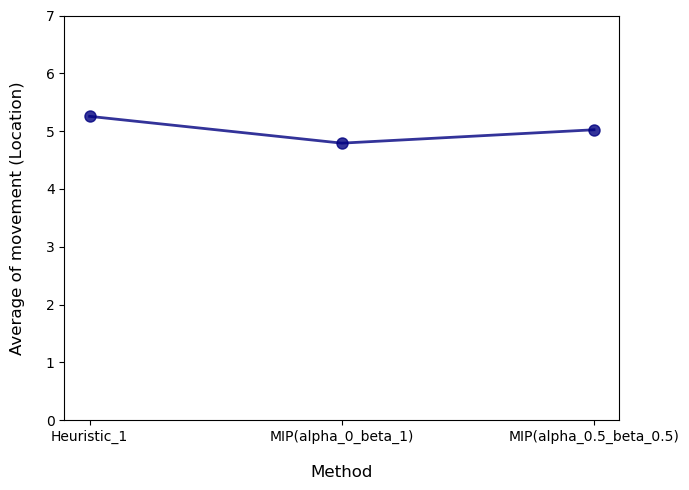

In [87]:
# Prepare data for plotting
methods = ['Heuristic_1'] + [f'MIP(alpha_{a}_beta_{b})' for a, b in zip(mip_data['alpha'], mip_data['beta'])]
loc_values = [heuristic_1_data_initial_0['Sum_Move_Loc']] +  mip_data['Sum_Move_Loc'].tolist()
# rot_values = [heuristic_1_data_initial_0['Sum_Move_Rot']] +  mip_data['Sum_Move_Rot'].tolist()

fig, ax = plt.subplots(figsize=(7, 5))

# Plot the line
ax.plot(methods, loc_values, color='navy', alpha=0.8, linewidth=2, marker='o', markersize=8, linestyle='-')
# ax.twinx().plot(methods, rot_values, color='red', alpha=0.8, linewidth=2, marker='s', markersize=8, linestyle='--')

# Customize labels and limits
ax.set_xlabel('Method', labelpad=15, fontsize=12)
ax.set_ylabel('Average of movement (Location)', labelpad=15, fontsize=12)
ax.set_ylim(0, 7)

# ax.twinx().set_ylabel('Average of movement (Rotation)', labelpad=15, fontsize=12)
# ax.twinx().set_ylim(0, 0.7)

# Set x-ticks and labels
ax.set_xticks(range(len(methods)))
ax.set_xticklabels(methods)

# Show the plot
plt.tight_layout()
plt.show()

c:\Users\purify\Anaconda3\envs\purify\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
c:\Users\purify\Anaconda3\envs\purify\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


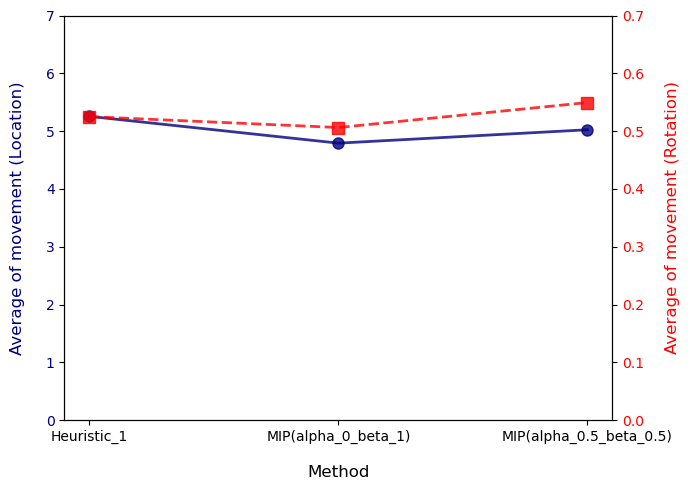

In [96]:
# Prepare data for plotting
methods = ['Heuristic_1'] + [f'MIP(alpha_{a}_beta_{b})' for a, b in zip(mip_data['alpha'], mip_data['beta'])]
loc_values = [heuristic_1_data_initial_0['Sum_Move_Loc']] + mip_data['Sum_Move_Loc'].tolist()
rot_values = [heuristic_1_data_initial_0['Sum_Move_Rot']] + mip_data['Sum_Move_Rot'].tolist()

fig, ax1 = plt.subplots(figsize=(7, 5))

# Plot Sum_Move_Loc
ax1.plot(methods, loc_values, color='navy', alpha=0.8, linewidth=2, marker='o', markersize=8, linestyle='-')
ax1.set_xlabel('Method', labelpad=15, fontsize=12)
ax1.set_ylabel('Average of movement (Location)', labelpad=15, fontsize=12, color='navy')
ax1.tick_params(axis='y', labelcolor='navy')
ax1.set_ylim(0, 7)

# Create a second y-axis for Sum_Move_Rot
ax2 = ax1.twinx()
ax2.plot(methods, rot_values, color='red', alpha=0.8, linewidth=2, marker='s', markersize=8, linestyle='--')
ax2.set_ylabel('Average of movement (Rotation)', labelpad=15, fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 0.7)

# Set x-ticks and labels
ax1.set_xticks(range(len(methods)))
ax1.set_xticklabels(methods)

# Show the plot
plt.tight_layout()
plt.show()

c:\Users\purify\Anaconda3\envs\purify\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
c:\Users\purify\Anaconda3\envs\purify\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


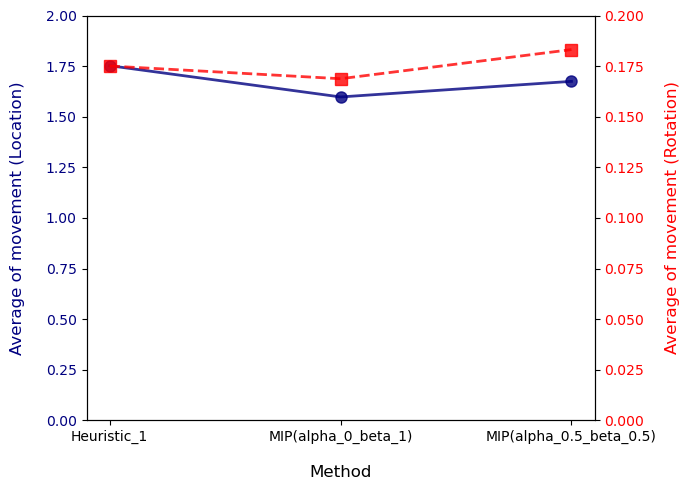

In [98]:
# Prepare data for plotting
methods = ['Heuristic_1'] + [f'MIP(alpha_{a}_beta_{b})' for a, b in zip(mip_data['alpha'], mip_data['beta'])]
loc_values = [heuristic_1_data_initial_0['Avg_Move_Loc']] + mip_data['Avg_Move_Loc'].tolist()
rot_values = [heuristic_1_data_initial_0['Avg_Move_Rot']] + mip_data['Avg_Move_Rot'].tolist()

fig, ax1 = plt.subplots(figsize=(7, 5))

# Plot Sum_Move_Loc
ax1.plot(methods, loc_values, color='navy', alpha=0.8, linewidth=2, marker='o', markersize=8, linestyle='-')
ax1.set_xlabel('Method', labelpad=15, fontsize=12)
ax1.set_ylabel('Average of movement (Location)', labelpad=15, fontsize=12, color='navy')
ax1.tick_params(axis='y', labelcolor='navy')
ax1.set_ylim(0, 2)

# Create a second y-axis for Sum_Move_Rot
ax2 = ax1.twinx()
ax2.plot(methods, rot_values, color='red', alpha=0.8, linewidth=2, marker='s', markersize=8, linestyle='--')
ax2.set_ylabel('Average of movement (Rotation)', labelpad=15, fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 0.2)

# Set x-ticks and labels
ax1.set_xticks(range(len(methods)))
ax1.set_xticklabels(methods)

# Show the plot
plt.tight_layout()
plt.show()

c:\Users\purify\Anaconda3\envs\purify\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


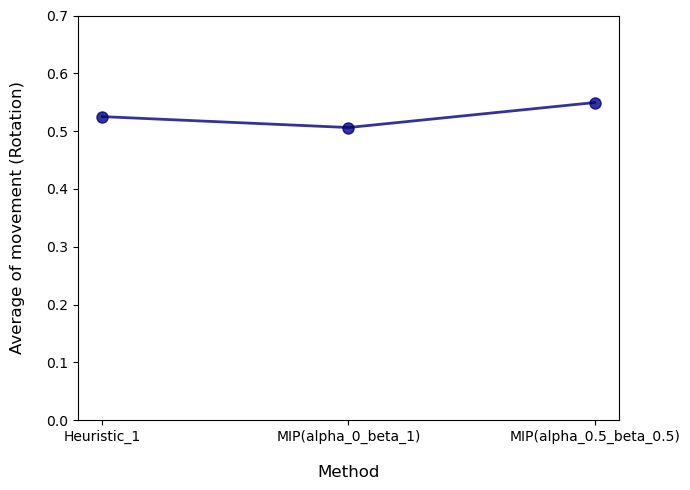

In [81]:
# Prepare data for plotting
methods = ['Heuristic_1'] + [f'MIP(alpha_{a}_beta_{b})' for a, b in zip(mip_data['alpha'], mip_data['beta'])]
values = [heuristic_1_data_initial_0['Sum_Move_Rot']] +  mip_data['Sum_Move_Rot'].tolist()

fig, ax = plt.subplots(figsize=(7, 5))

# Plot the line
ax.plot(methods, values, color='navy', alpha=0.8, linewidth=2, marker='o', markersize=8, linestyle='-')

# Customize labels and limits
ax.set_xlabel('Method', labelpad=15, fontsize=12)
ax.set_ylabel('Average of movement (Rotation)', labelpad=15, fontsize=12)
ax.set_ylim(0, 0.7)

# Set x-ticks and labels
ax.set_xticks(range(len(methods)))
ax.set_xticklabels(methods)

# Show the plot
plt.tight_layout()
plt.show()

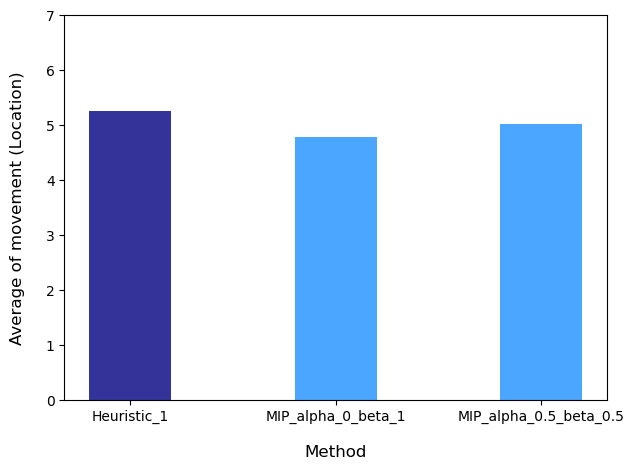

In [65]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.bar('Heuristic_1', heuristic_1_data_initial_0['Sum_Move_Loc'], label='Heuristic_1', color='navy', alpha=0.8, width = 0.4)

ax.set_xlabel('Method', labelpad=15, fontsize=12)
ax.set_ylabel('Average of movement (Location)', labelpad=15, fontsize=12)
# ylimit
ax.set_ylim(0, 7)
for i in range(len(mip_data)):
    ax.bar(f'MIP_alpha_{mip_data["alpha"][i]}_beta_{mip_data["beta"][i]}', mip_data['Sum_Move_Loc'][i], label=f'MIP_{mip_data["alpha"][i]}_{mip_data["beta"][i]}', alpha=0.8, color='dodgerblue', width = 0.4)

plt.show()


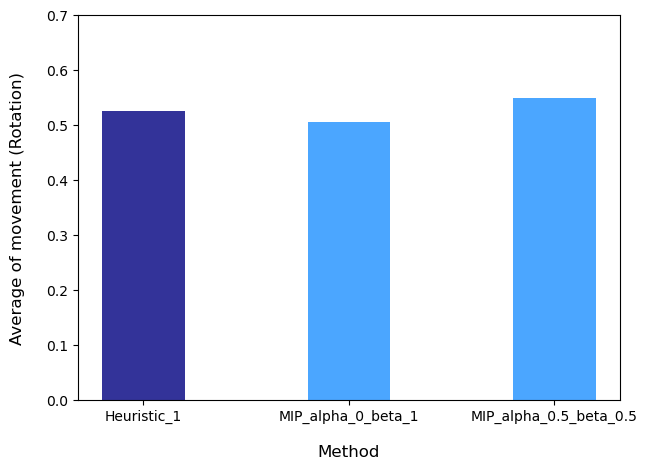

In [66]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.bar('Heuristic_1', heuristic_1_data_initial_0['Sum_Move_Rot'], label='Heuristic_1', color='navy', alpha=0.8, width = 0.4)

ax.set_xlabel('Method', labelpad=15, fontsize=12)
ax.set_ylabel('Average of movement (Rotation)', labelpad=15, fontsize=12)
# ylimit
ax.set_ylim(0, 0.7)
for i in range(len(mip_data)):
    ax.bar(f'MIP_alpha_{mip_data["alpha"][i]}_beta_{mip_data["beta"][i]}', mip_data['Sum_Move_Rot'][i], label=f'MIP_{mip_data["alpha"][i]}_{mip_data["beta"][i]}', color='dodgerblue', alpha=0.8, width = 0.4)

plt.show()
